In [78]:
import numpy as np 
import pandas as pd

In [79]:
with open("spam.csv", "r", encoding="utf-8", errors="ignore") as f:
    df = pd.read_csv(f)


In [80]:
df.shape

(5572, 5)

In [81]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
#data cleaning
#EDA
#Text preprocessing
#model building
#evaluation 
#improvement
#website 
#heroku

Data Cleaning


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [84]:
#drop last 3 columns 

In [85]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace = True)

In [86]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [87]:
#renaming the columns 

In [88]:
df.rename(columns={"v1" : "target" , "v2" : "text"},inplace= True)

In [89]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [90]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [91]:
df['target'] = encoder.fit_transform(df['target'])


In [92]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
#check the missing values

In [94]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [95]:
#check for duplicate values

In [96]:
df.duplicated().sum()

404

In [97]:
df = df.drop_duplicates(keep = "first")

In [98]:
df.duplicated().sum()

0

In [99]:
df.shape

(5168, 2)

EDA #analysis of data 

In [100]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [102]:
import matplotlib.pyplot as plt

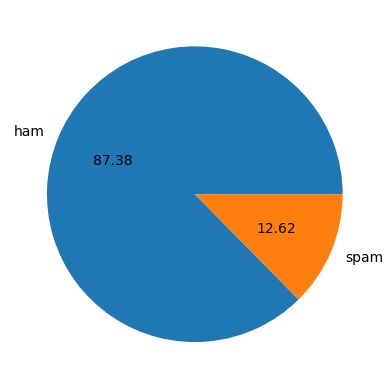

In [103]:
plt.pie(df["target"].value_counts() , labels=['ham','spam'] , autopct='%0.2f')
plt.show()

In [104]:
#data is imbalance

In [105]:
import nltk #natural language processing

In [106]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
df['num_character'] = df['text'].apply(len) #number of characters used

C:\Users\sharm\AppData\Local\Temp\ipykernel_18816\2514719807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character'] = df['text'].apply(len) #number of characters used


In [108]:
df = df.drop(columns = ["character"])

KeyError: "['character'] not found in axis"

In [ ]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159
5568,0,Will _ b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
#number of words

In [110]:
df["num-words"] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\sharm\AppData\Local\Temp\ipykernel_18816\1647606470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num-words"] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [111]:
df

,target,text,num_character,num-words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35
5568,0,Will _ b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [112]:
df.head()

,target,text,num_character,num-words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [115]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\sharm\AppData\Local\Temp\ipykernel_18816\878202491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [116]:
df

,target,text,num_character,num-words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [117]:
import seaborn as sns 

<Axes: xlabel='num_character', ylabel='Count'>

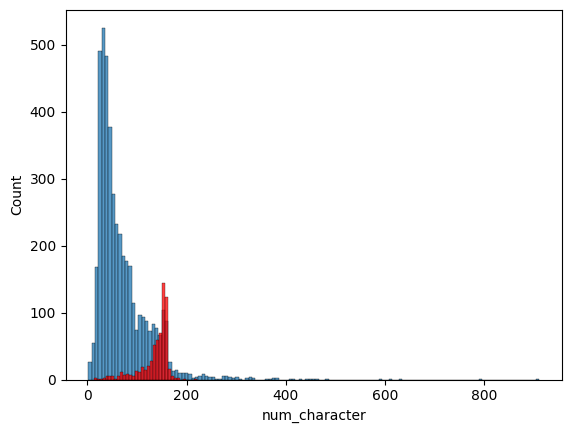

In [121]:
sns.histplot(df[df["target"] == 0]['num_character'])
sns.histplot(df[df["target"] == 1]['num_character'],color= 'red')

C:\Users\sharm\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sharm\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sharm\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


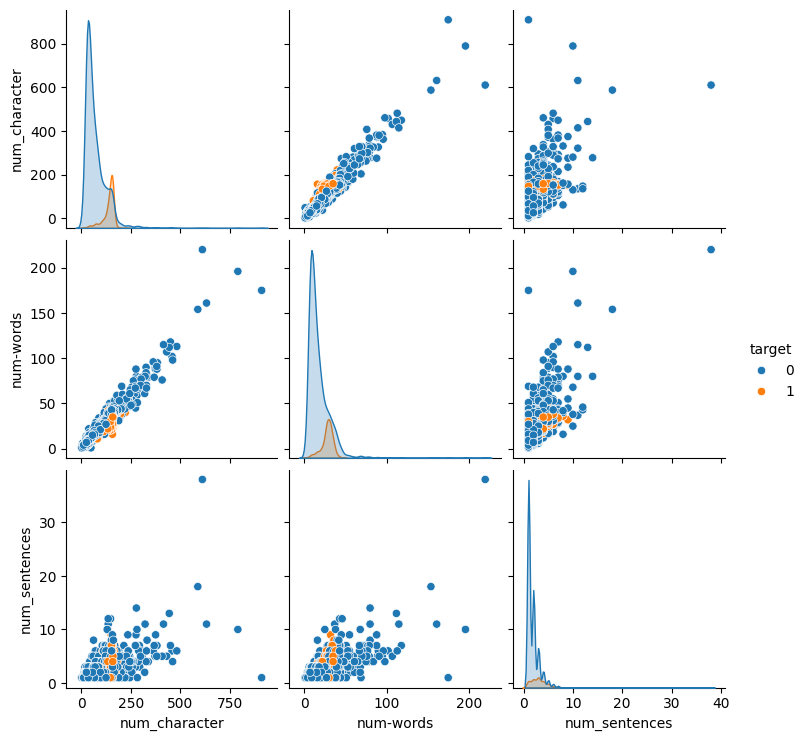

In [124]:
sns.pairplot(df,hue='target')

In [128]:
#data preprocessing
#lowercase, tokenization , remove special characters, remove stop words, stemming 

In [137]:
from nltk.corpus import stopwords

In [134]:
def transorm_text(text) : 
    text = text.lower()
    text = nltk.word_tokenize(text)  #the text has come in the list
    y=[]
    for i in text: 
        if i.isalnum(): #special character are removed
            y.append(i)
    return y

In [136]:
transorm_text("HOW are you!#?")

['how', 'are', 'you']